In [121]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
#inline backend pour voir les figures dans le frontend notebook https://ipython.readthedocs.io/en/stable/interactive/plotting.html

#file_name='results_'+str(nobs)+"obs_quad"+str(ntheta)+"/"
file_name='results/'
shortprefixe=file_name

obso=pd.DataFrame(data=np.loadtxt(shortprefixe+"observations.gnu"),columns=['x','y'])
pkoh=pd.DataFrame(data=np.loadtxt(shortprefixe+"pkoh.gnu"),columns=['t1','prob'])
popt=pd.DataFrame(data=np.loadtxt(shortprefixe+"popt.gnu"),columns=['t1','prob'])
hopt=pd.DataFrame(data=np.loadtxt(shortprefixe+"hopt.gnu"),columns=['t1','edm','exp','lcor'])
#pbayes=pd.DataFrame(data=np.loadtxt(shortprefixe+"pbayes.gnu"),columns=['t1','prob'])
selected_samples=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmcselectedsamples.gnu"),columns=['t1','edm','exp','lcor','p'])
selected_samples_left=pd.DataFrame(data=np.loadtxt(shortprefixe+"ssleft.gnu"),columns=["t1"])
selected_samples_full=pd.DataFrame(data=np.loadtxt(shortprefixe+"ssfull.gnu"),columns=["t1"])
selected_samples_right=pd.DataFrame(data=np.loadtxt(shortprefixe+"ssright.gnu"),columns=["t1"])
selected_samples_joint=pd.DataFrame(data=np.loadtxt(shortprefixe+"ssjoint.gnu"),columns=["t1"])
selected_samples_opti1=pd.DataFrame(data=np.loadtxt(shortprefixe+"ssopti1.gnu"),columns=["t1"])
psimp=pd.DataFrame(data=np.loadtxt(shortprefixe+"psimp.gnu"),columns=['t1','prob'])
pcv=pd.DataFrame(data=np.loadtxt(shortprefixe+"pcv.gnu"),columns=['t1','prob'])
prec=pd.DataFrame(data=np.loadtxt(shortprefixe+"recons.gnu"),columns=['t1','popt','pkoh','pbayes'])
#samp_mcmc=pd.DataFrame(data=np.loadtxt(shortprefixe+"mcmcallsamples.gnu"),columns=['t1','edm','exp','lcor','p'])

In [104]:
def plot_meanpred(dataf,ax=None):
    #affichage de prédictions moyennes
    if ax is None:
        ax=plt.gca()
    
    ax.scatter(obso['x'],obso['y'],color='tab:red',label='observations')
    ax.plot(dataf['x'],dataf['ymean'],color='black',label='mean prediction')
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']+dataf['stdf'],alpha=0.2,color='green',label='uncertainty in the corrected model')
    
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf'],color='black',alpha=0.2)
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']-dataf['stdf']-dataf['stdedm'],alpha=0.2,color='blue',label='residual uncertainty')
    ax.fill_between(dataf['x'],dataf['ymean']+dataf['stdf'],dataf['ymean']+dataf['stdf']+dataf['stdedm'],alpha=0.2,color='blue')
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf']+dataf['stdedm'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf']-dataf['stdedm'],color='black',alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid()
    
def plot_meanpred_nolabel(dataf,ax=None):
    #affichage de prédictions moyennes
    if ax is None:
        ax=plt.gca()
    
    ax.scatter(obso['x'],obso['y'],color='tab:red',label='observations')
    ax.plot(dataf['x'],dataf['ymean'],color='black',label='mean prediction')
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']+dataf['stdf'],alpha=0.2,color='green',label='uncertainty in the corrected model')
    
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf'],color='black',alpha=0.2)
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']-dataf['stdf']-dataf['stdedm'],alpha=0.2,color='blue',label='residual uncertainty')
    ax.fill_between(dataf['x'],dataf['ymean']+dataf['stdf'],dataf['ymean']+dataf['stdf']+dataf['stdedm'],alpha=0.2,color='blue')
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf']+dataf['stdedm'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf']-dataf['stdedm'],color='black',alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()
    
def plot_meanpredFZ(dataf,ax=None):
    #affichage de prédictions moyennes
    if ax is None:
        ax=plt.gca()
    ax.scatter(obso['x'],obso['y'],marker='+',s=300,color='tab:red',label=r'observations')
    ax.plot(dataf['x'],dataf['ymean'],color='black',label=r'$E_{\theta}[f(\mathbf{x},\theta)]$')
    ax.fill_between(dataf['x'],dataf['ymean']-dataf['stdf'],dataf['ymean']+dataf['stdf'],alpha=0.2,color='green') #,label=r'$\mathrm{Var}_{\theta}[f(\mathbf{x},\theta)]$'
    ax.plot(dataf['x'],dataf['ymean']-dataf['stdf'],color='black',alpha=0.2)
    ax.plot(dataf['x'],dataf['ymean']+dataf['stdf'],color='black',alpha=0.2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    handles, labels = ax.get_legend_handles_labels()
    handles[0],handles[1]=handles[1],handles[0]
    labels[0],labels[1]=labels[1],labels[0]
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.legend(handles,labels)
    ax.grid()

In [105]:
#print(mpl.rcParams)

(-0.2, 1.3)

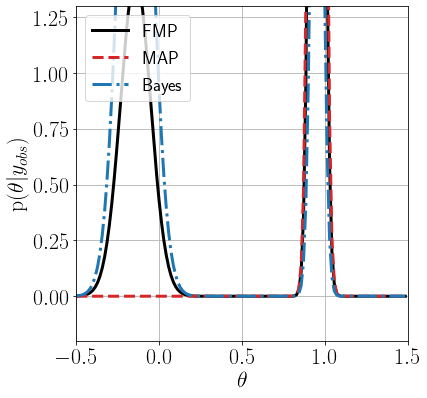

In [114]:
xmin=-0.5
xmax=1.5
plt.figure(figsize=[6,6])
ax=plt.subplot(111)
cs=plt.plot(prec['t1'],prec['popt'],label='FMP',color='black',marker=None,linewidth=3)
cs=plt.plot(prec['t1'],prec['pkoh'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
cs=plt.plot(prec['t1'],prec['pbayes'],'-.',label='Bayes',color='tab:blue',marker=None,linewidth=3)
#cs=plt.plot(pcv['t1'],pcv['prob'],label='CV',color='tab:orange',marker=None,linewidth=2)
#plt.title('Reconstructed parameter posterior density')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathrm{p}(\theta|y_{obs})$')
plt.grid()
plt.legend(loc='upper left')
plt.tight_layout()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

           t1      prob
0   -0.492857  0.131363
1   -0.478571  0.137713
2   -0.464286  0.145369
3   -0.450000  0.154548
4   -0.435714  0.165503
..        ...       ...
135  1.435714  0.000000
136  1.450000  0.000000
137  1.464286  0.000000
138  1.478571  0.000000
139  1.492857  0.000000

[140 rows x 2 columns]
69.99999896
44.93281842
0.35714285714285715


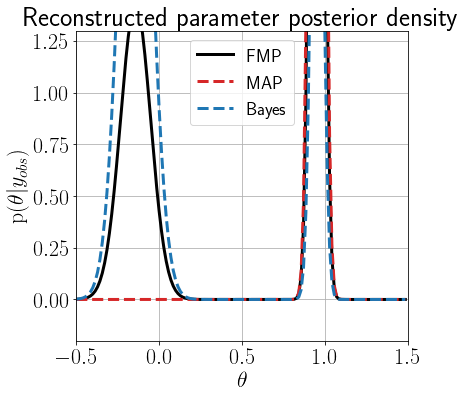

In [115]:
plt.figure(figsize=[6,6])
ax=plt.subplot(111)
cs=plt.plot(prec['t1'],prec['popt'],label='FMP',color='black',marker=None,linewidth=3)
cs=plt.plot(prec['t1'],prec['pkoh'],'--',label='MAP',color='tab:red',marker=None,linewidth=3)
cs=plt.plot(prec['t1'],prec['pbayes'],'--',label='Bayes',color='tab:blue',marker=None,linewidth=3)
#cs=plt.plot(pcv['t1'],pcv['prob'],label='CV',color='tab:orange',marker=None,linewidth=2)
plt.title('Reconstructed parameter posterior density')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\mathrm{p}(\theta|y_{obs})$')
plt.grid()
plt.legend()
plt.tight_layout()
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

#print(pmcmc[(pmcmc['t1']>0.5)])
#on cherche à savoir quel pourcentage de la massge de proba est à gauche, pour opti. popt['t1'] et popt['prob']
print(popt)
print(np.sum(popt['prob'])) ##70 la somme totale. semble logique
print(np.sum(popt[(popt['t1']>0.5)]['prob'] ))
print(25/70)

(-0.5, 1.5)

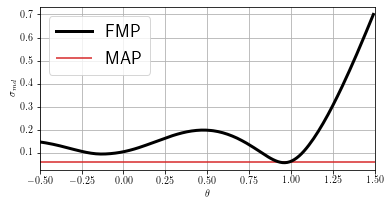

In [108]:
#meilleurs hyperparamètres. Valeurs KOH à régler à la mano. Et CV aussi.
xmin=-0.5
xmax=1.5
ymin=0
ymax=0.2

#tri des valeurs avant affichage
hopt=hopt.sort_values('t1')


plt.figure(figsize=[6,3])
ax=plt.subplot(111)

#cs=plt.scatter('t1','edm',data=hopt,label='FMP',color='tab:grey')
cs=plt.plot(hopt['t1'],hopt['edm'],label='FMP',color='black',marker=None,linewidth=3)

plt.hlines(0.06,xmin,xmax,label='MAP',color='tab:red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('$\sigma_{md}$')
plt.grid()
plt.legend()
ax.set_xlim(xmin,xmax)
#ax.set_ylim(ymin,ymax)

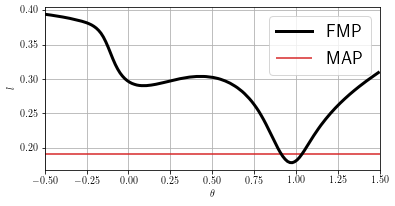

In [109]:
plt.figure(figsize=[6,3])
ax=plt.subplot(111)
#cs=plt.scatter('t1','lcor',data=hopt,label='FMP',color='tab:grey')
cs=plt.plot(hopt['t1'],hopt['lcor'],label='FMP',color='black',marker=None,linewidth=3)
plt.hlines(0.19,xmin,xmax,label='MAP',color='tab:red')
plt.legend()
ax.set_xlim(xmin,xmax)
#ax.set_ylim(0.09,0.011)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$l$')
plt.grid()

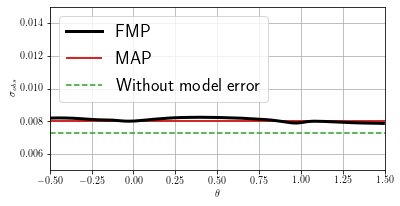

In [110]:
plt.figure(figsize=[6,3])
ax=plt.subplot(111)
#cs=plt.scatter('t1','exp',data=hopt,label='FMP',color='tab:grey')
cs=plt.plot(hopt['t1'],hopt['exp'],label='FMP',color='black',marker=None,linewidth=3)
plt.hlines(0.008,xmin,xmax,label='MAP',color='tab:red',linewidth=2)
plt.hlines(0.0073,xmin,xmax,linestyle='--',label='Without model error',color='tab:green')
plt.legend(loc='upper left')
ax.set_xlim(xmin,xmax)
ax.set_ylim(0.005,0.015)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sigma_{obs}$')
plt.grid()
#plt.tight_layout()

997


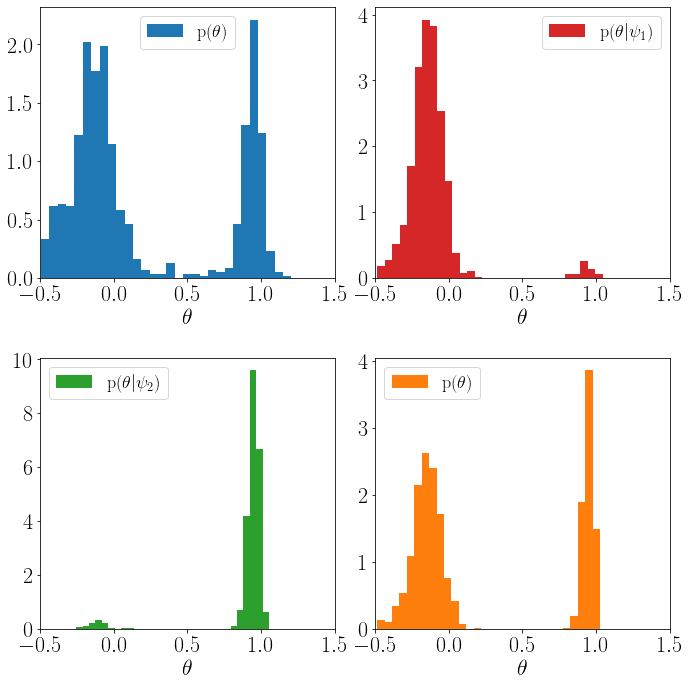

In [123]:
mpl.rcParams['text.usetex']=True
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22

mpl.rcParams['legend.fontsize']=18

nbins=30
xmin=-0.5
xmax=1.5
ymin=0
ymax=15
plt.figure(figsize=[10,10])
ax=plt.subplot(221)
ax.hist(selected_samples_full['t1'],bins=nbins,density=True,label=r'$\mathrm{p}(\theta)$',zorder=0)
#cs=plt.scatter(selected_samples['t1'],np.exp(selected_samples['p']),label='BAYES',color='tab:grey',marker=None,linewidth=2)
#cs=plt.scatter('t1','prob',data=popt,label='Opti',color='tab:grey',marker=None,linewidth=2)
#cs=plt.scatter('t1','prob',data=pkoh,label='KOH',color='tab:red',marker=None,linewidth=2)
ax.set_xlabel(r'$\theta$')
ax2=plt.subplot(222)
ax2.hist(selected_samples_left['t1'],bins=nbins,density=True,color='tab:red',label=r'$\mathrm{p}(\theta|\psi_1)$',zorder=0)
ax2.set_xlabel(r'$\theta$')

ax3=plt.subplot(223)
ax3.hist(selected_samples_right['t1'],bins=nbins,density=True,color='tab:green',label=r'$\mathrm{p}(\theta|\psi_2)$',zorder=0)
ax3.set_xlabel(r'$\theta$')

ax4=plt.subplot(224)
ax4.hist(selected_samples_joint['t1'],bins=nbins,density=True,color='tab:orange',label=r'$\mathrm{p}(\theta)$',zorder=0)
ax4.set_xlabel(r'$\theta$')

ax.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.tight_layout()
ax.set_xlim(xmin,xmax)
ax2.set_xlim(xmin,xmax)
ax3.set_xlim(xmin,xmax)
ax4.set_xlim(xmin,xmax)
print(selected_samples_full.size)

(-0.2, 1.3)

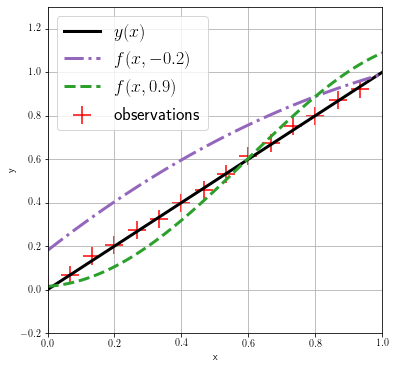

In [112]:
#calcul des répartitions de masses


[   0    1    2 ... 9997 9998 9999]


NameError: name 'samp_mcmc' is not defined

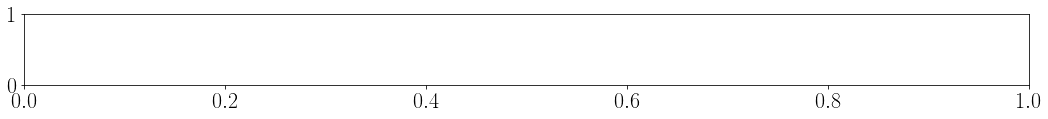

In [113]:
# affichage de la totalité des samples de la mcmc.
lw=1.4 #linewidth
lp=30 #labelpad
#samp_mcmcselect['t1'].plot(kind='line')
X=np.arange(10000)
print(X)
#print(samp_mcmcselect['t1'][X])

mpl.rcParams['text.usetex']=True
mpl.rcParams['font.sans-serif']='Arial'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['savefig.format']='png'
mpl.rcParams['font.size']=22

plt.figure(figsize=[18,6])
ax=plt.subplot(411)
ax.plot(X,samp_mcmc['t1'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$\theta$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

ax=plt.subplot(412)
ax.plot(X,samp_mcmc['edm'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$\sigma_{md}$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

ax=plt.subplot(413)
ax.plot(X,samp_mcmc['lcor'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$l$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

ax=plt.subplot(414)
ax.plot(X,samp_mcmc['exp'][X],color='tab:grey',linewidth=lw)
ax.yaxis.set_label_position("right")
ax.set_xticklabels([])
ax.set_xlim(X[0],X[-1])
ax.set_ylabel(r'$\sigma_{obs}$',rotation='horizontal',labelpad=lp)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.grid()

plt.show()




In [ ]:
fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=[18,6],sharey=True,sharex=True)
plot_meanpred(predopt,ax1)
ax1.set_title('FMP predictions')
plot_meanpred_nolabel(predkoh,ax2)
ax2.set_title('MAP predictions')
plot_meanpred_nolabel(predmcmc,ax3)
ax3.set_title('Bayesian predictions')

fig,((ax1,ax2,ax3))=plt.subplots(1,3,figsize=[18,6],sharey=True,sharex=True)
plot_meanpredFZ(predoptFZ,ax1)
ax1.set_title('FMP predictions')
plot_meanpredFZ(predkohFZ,ax2)
ax2.set_title('MAP predictions')
plot_meanpredFZ(predmcmcFZ,ax3)
ax3.set_title('Bayesian predictions')

In [ ]:
plt.figure(figsize=[6,6])
ax=plt.subplot(111)
plot_meanpredFZ(predoptFZ,ax)

In [ ]:
plt.figure(figsize=[6,6])
ax=plt.subplot(111)
plot_meanpredFZ(predkohFZ,ax)

In [ ]:
plt.figure(figsize=[6,6])
ax=plt.subplot(111)
plot_meanpredFZ(predmcmcFZ,ax)